In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [8]:
data = pd.read_csv(r"C:\Users\karpo\OneDrive\Desktop\Netflix\netflix_titles.csv", encoding='latin1')
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Lets delete useless columns

In [9]:
data=data.drop(['Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25'],axis=1)
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [10]:
data=data.dropna(subset=['rating','duration','date_added'])
data=data.fillna('Unknown')
net_films=data[data['type']=="Movie"].copy()
net_shows=data[data['type']=="TV Show"].copy()

#Lets see what more on Netflix platform films or TV shows

In [11]:
types=data['type']. value_counts()

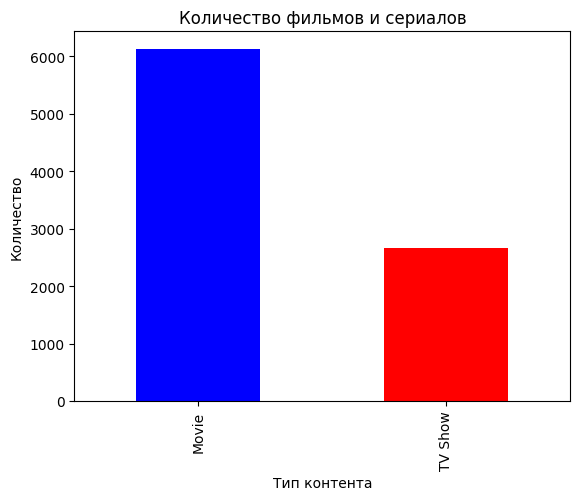

In [12]:
types.plot(kind='bar',color=['blue','red'])
plt.title('Количество фильмов и сериалов')
plt.xlabel('Тип контента')
plt.ylabel('Количество')
plt.show()


We can see that netflix platform has more films then TV shows

# Lets work with movies


Top 10 countries that produce movies

In [13]:
net_films['country'].value_counts()

country
United States                            2056
India                                     893
Unknown                                   439
United Kingdom                            206
Canada                                    122
                                         ... 
United Kingdom, Russia, United States       1
Paraguay, Argentina                         1
United Kingdom, Malawi                      1
Austria, Iraq, United States                1
United Arab Emirates, Jordan                1
Name: count, Length: 652, dtype: int64

In [14]:
country_count={}
col=net_films['country']
for i in col:
  i=i.replace(' ','')
  i=list(i.split(','))
  for j in i:
    country_count[j]=country_count.get(j,1)+1


In [15]:
popular_countries=sorted(country_count.items(), key=lambda item: country_count[item[0]], reverse=True)

In [16]:
popular_countries=popular_countries[:10]
names=[name for name,amount in popular_countries]
amount=[amount for name, amount in popular_countries]

Text(0.5, 1.0, 'Country')

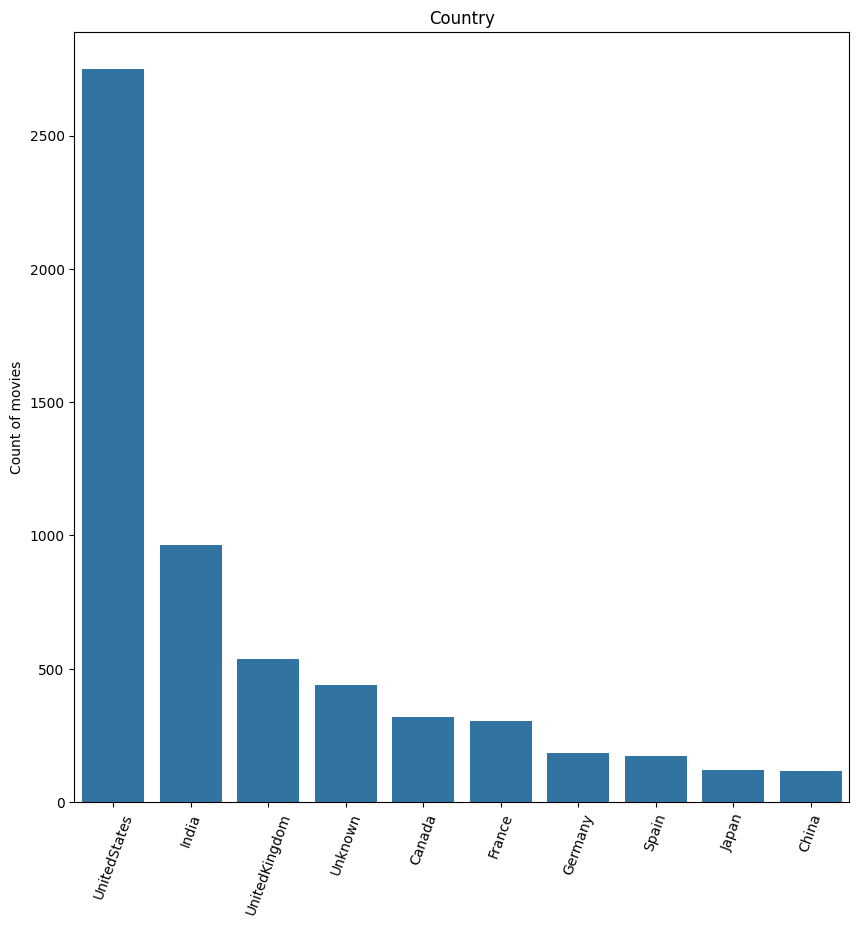

In [17]:
plt.figure(figsize=(10,10))
ax = sns.barplot(x=names, y=amount)
ax.set_xticklabels(names, rotation=70)
ax.set_ylabel("Count of movies")
ax.set_title("Country")

Popular movie genres

In [18]:
frec_genres={}
col=net_films['listed_in']
for i in col:
  i=i.replace(' ','')
  i=list(i.split(','))
  for j in i:
    frec_genres[j]=frec_genres.get(j,1)+1

In [19]:
popular_genres=sorted(frec_genres.items(), key=lambda item: frec_genres[item[0]], reverse=True)
genres=[name for name,count in popular_genres]
value=[count for name,count in popular_genres]

Text(0.5, 1.0, 'Genres')

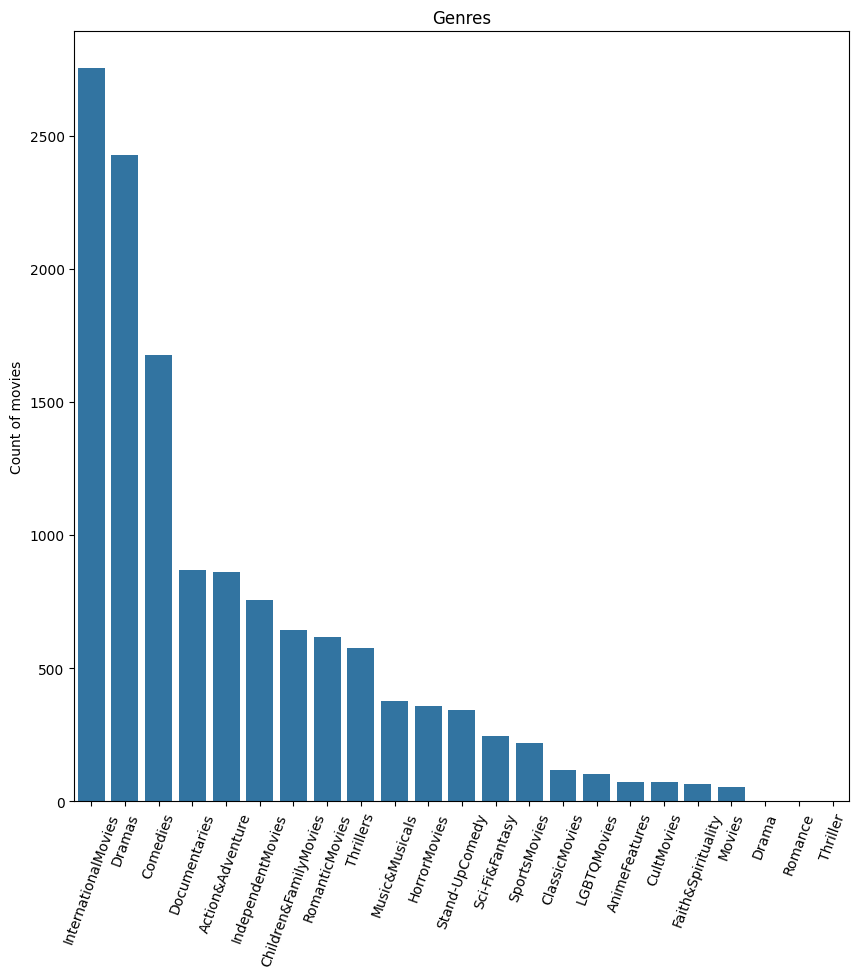

In [20]:
fig = plt.figure(figsize = (10, 10))
ax = sns.barplot(x=genres, y=value)

ax.set_xticklabels(genres, rotation=70)
ax.set_ylabel("Count of movies")
ax.set_title("Genres")


Popular movie genres

In [21]:
net_films['duration'] = net_films['duration'].str.replace('min','')
net_films['duration'] =net_films['duration'].astype(int)


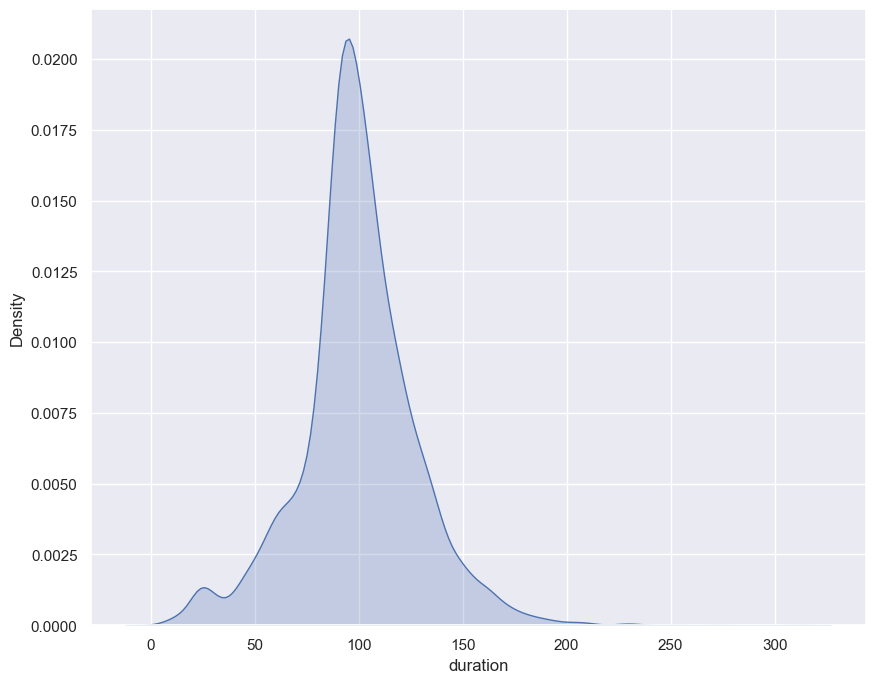

In [22]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 8))
sns.kdeplot(data=net_films['duration'], shade=True);

# Lets work with TV shows

In [23]:
net_shows.shape

(2665, 12)


Top 10 countries that produce TV
shows

In [24]:
country_count={}
col=net_shows['country']
for i in col:
  i=i.replace(' ','')
  i=list(i.split(','))
  for j in i:
    country_count[j]=country_count.get(j,1)+1

In [25]:
popular_countries=sorted(country_count.items(), key=lambda item: country_count[item[0]], reverse=True)

In [26]:
popular_countries=popular_countries[:10]
names=[name for name,amount in popular_countries]
amount=[amount for name, amount in popular_countries]

Text(0.5, 1.0, 'Country')

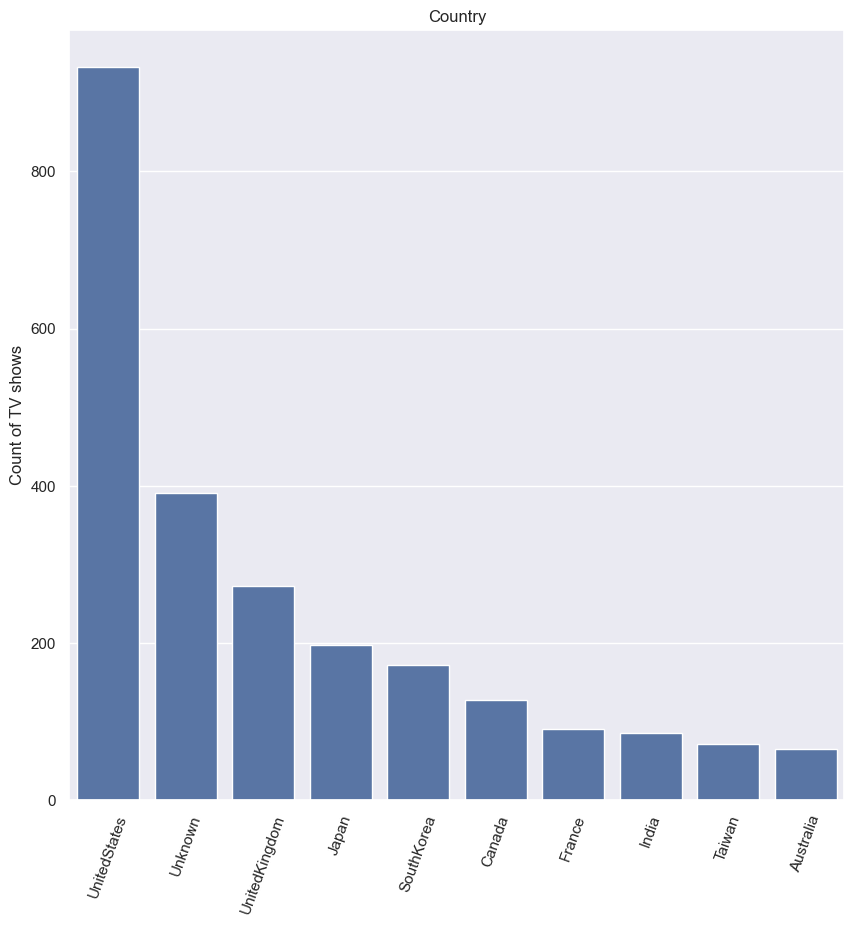

In [27]:
plt.figure(figsize=(10,10))
ax = sns.barplot(x=names, y=amount)
ax.set_xticklabels(names, rotation=70)
ax.set_ylabel("Count of TV shows")
ax.set_title("Country")

The most popular genres in TV show

In [28]:
genres_count={}
col=net_shows['listed_in']
for i in col:
  i=i.replace(' ','')
  i=list(i.split(','))
  for j in i:
    genres_count[j]=genres_count.get(j,1)+1

In [29]:
popular_genres=sorted(genres_count.items(), key=lambda item: genres_count[item[0]], reverse=True)

In [30]:
popular_genres=popular_genres[:10]
genres=[name for name,amount in popular_genres]
amount=[amount for name, amount in popular_genres]

Text(0.5, 1.0, 'Genres')

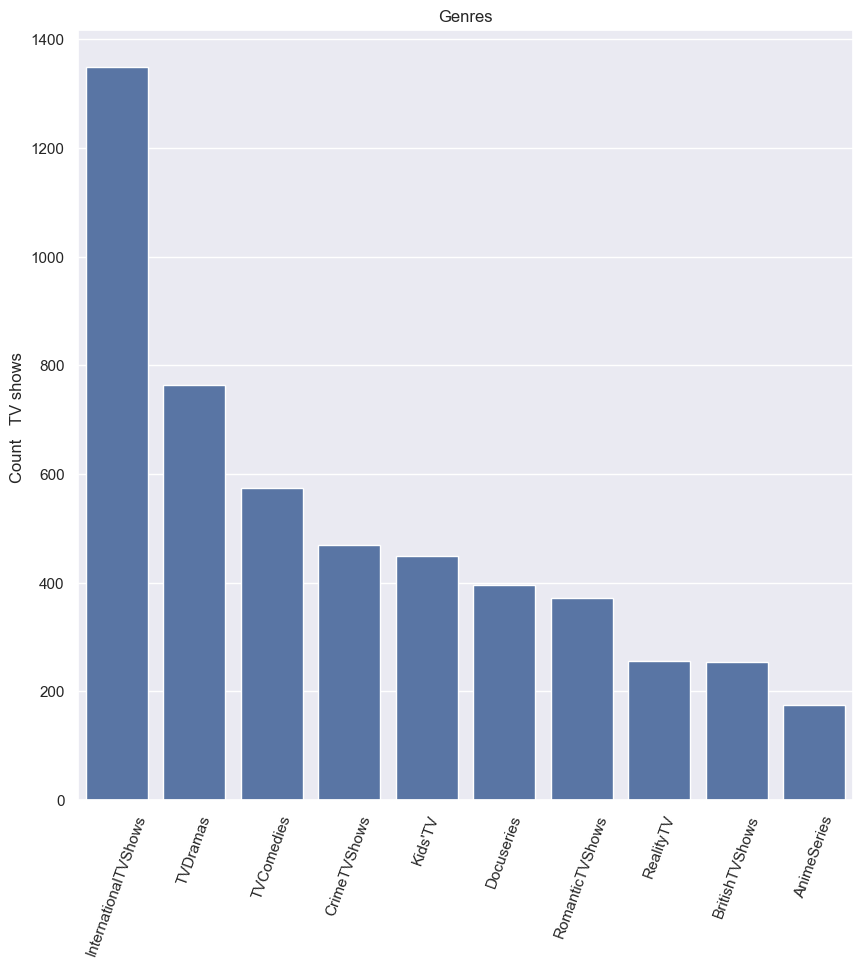

In [31]:
plt.figure(figsize=(10,10))
ax = sns.barplot(x=genres, y=amount)
ax.set_xticklabels(genres, rotation=70)
ax.set_ylabel("Count   TV shows ")
ax.set_title("Genres")

Top 10 longest TV shows

In [32]:
features = ['title', 'duration']
durations = net_shows[features]
durations

,title,duration
1,Blood & Water,2 Seasons
2,Ganglands,1 Season
3,Jailbirds New Orleans,1 Season
4,Kota Factory,2 Seasons
5,Midnight Mass,1 Season
...,...,...
8796,Yunus Emre,2 Seasons
8797,Zak Storm,3 Seasons
8800,Zindagi Gulzar Hai,1 Season
8803,Zombie Dumb,2 Seasons


In [33]:
durations['no_of_seasons'] = durations['duration'].str.replace(' Season','')
durations

,title,duration,no_of_seasons
1,Blood & Water,2 Seasons,2s
2,Ganglands,1 Season,1
3,Jailbirds New Orleans,1 Season,1
4,Kota Factory,2 Seasons,2s
5,Midnight Mass,1 Season,1
...,...,...,...
8796,Yunus Emre,2 Seasons,2s
8797,Zak Storm,3 Seasons,3s
8800,Zindagi Gulzar Hai,1 Season,1
8803,Zombie Dumb,2 Seasons,2s


In [34]:
durations['no_of_seasons'] = durations['no_of_seasons'].str.replace('s', '')
durations['no_of_seasons'] = durations['no_of_seasons'].astype(int)
durations

,title,duration,no_of_seasons
1,Blood & Water,2 Seasons,2
2,Ganglands,1 Season,1
3,Jailbirds New Orleans,1 Season,1
4,Kota Factory,2 Seasons,2
5,Midnight Mass,1 Season,1
...,...,...,...
8796,Yunus Emre,2 Seasons,2
8797,Zak Storm,3 Seasons,3
8800,Zindagi Gulzar Hai,1 Season,1
8803,Zombie Dumb,2 Seasons,2


In [35]:
t = ['title', 'no_of_seasons']
top = durations[t]

top = top.sort_values(by='no_of_seasons', ascending=False)

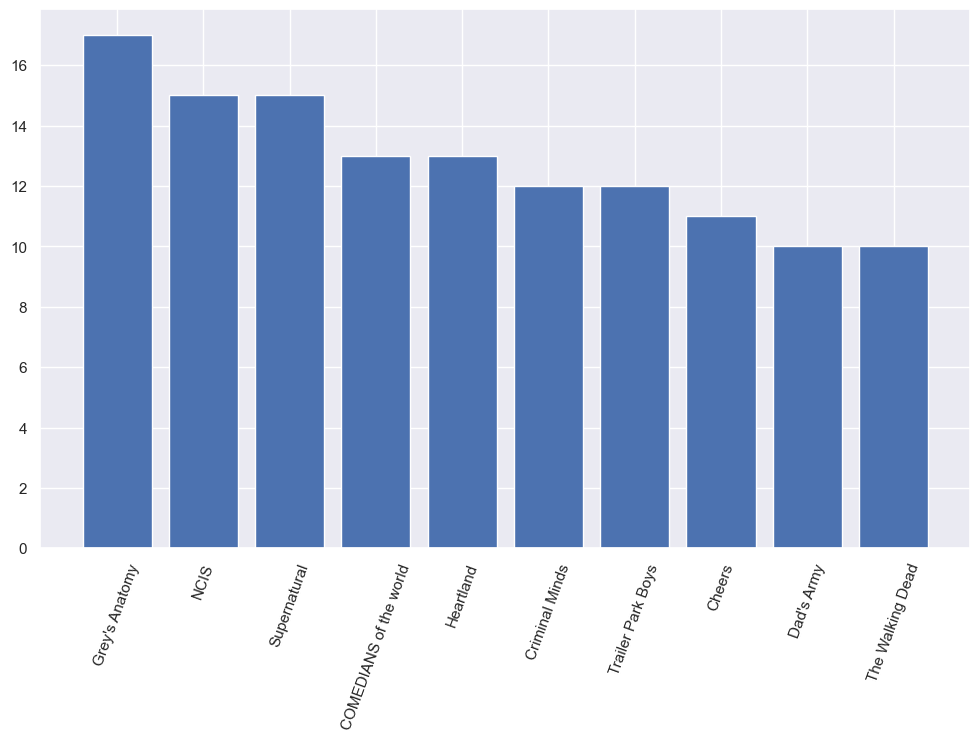

In [36]:
top10 = top[0:10]
plt.figure(figsize=(12, 7))

plt.bar(top10['title'], top10['no_of_seasons'])
plt.xticks(top10['title'], rotation=70);

Durations  od TV show

([<matplotlib.axis.XTick at 0x21c354a9310>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(15, 0, '15'),
  Text(17, 0, '17')])

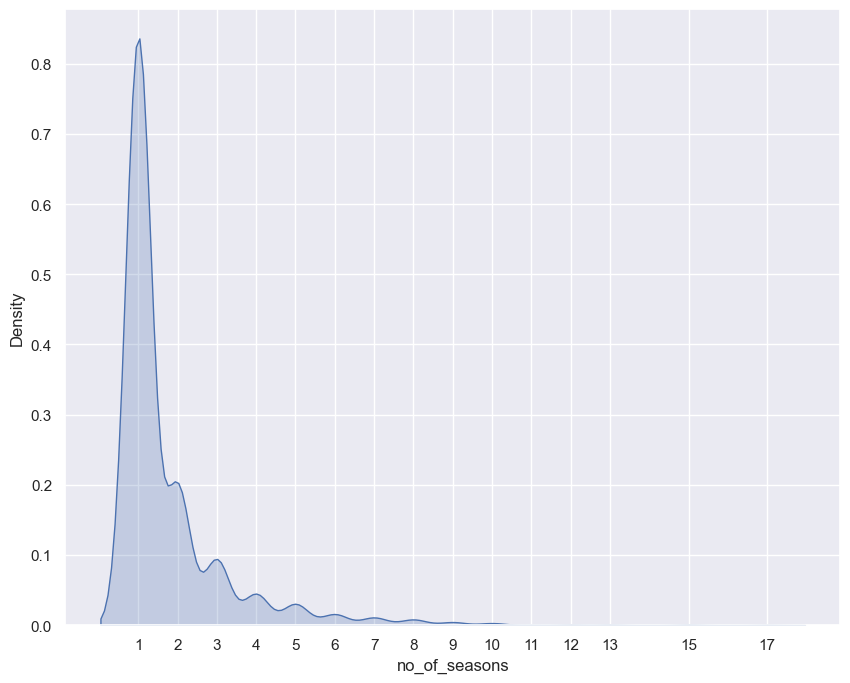

In [37]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 8))
sns.kdeplot(data=durations['no_of_seasons'], shade=True)
plt.xticks(sorted(durations['no_of_seasons'].unique()))

In [38]:
net_films.to_csv('net_films.csv', index=False)  
net_shows.to_csv('net_shows.csv', index=False) 

